# Tallberg deposit: Exploration practical
## Reconnaissance: Till Geochemistry

You are conducting a reconnaissance study of the **Jörn granite** to explore for porphyry copper deposits. You have collected till samples from the locations on the map below and analysed them for copper contents listed in the data table, courtesy of SGU. ( We expect you to plot 15-20 points with anomalous concentrations ). The ice-flow direction is indicated by symbol D i.e. : <img src=./Images/D%20arrow.png width=80 height=40 display='inline' style="vertical-align:top">


<img src=./Images/map.png width=700 height=600 style="display: block; margin: 0 auto">

### Geological Setting:

The Tallberg porphyry deposit is found amongst the **Jörn granite complex** , adjacent to the _Skellefte_ region, Northern Sweden.

<img src=./Images/Gelogical%20Setting.png width=600 height=500 style="display: block; margin: 0 auto">

### Lithology:

The **Jörn granite complex** (JGC) is a multiple intrusion with three, or possibly four, intrusive phases. The batholith is zoned, with an older, least differentiated intrusive phases GI of  _*(Wilson et al. 1987)*_ forming an outer zone (Fig. 2). A smaller and younger granitoid intrusion occurs around the village of Jörn (GII), and a large central granite diapir (GIII) cuts the GI and GII phases. _*(Wilson et al. 1987)*_ also recognize a GIV phase in the central Gill diapir.

<div style="display: flex;justify-content: center">
<img src=./Images/Geological%20Setting%202.png width=500 height=500 style="margin: 10px 35px">
<img src=./Images/Geological%20Setting%203.png width=500 height=500 style="margin: 10px 35px">
</div>

Before jumping to first question, a little preparation is needed. We are going to use Python Programming Language for further data manipulation and processing:

### Installing required packages

Following command cells, some of the libraries needed most for this assignment has been mentioned. If you come up with new ideas in which new libraries required, feel free to add them here.
It is recommended to unify all `import`s on one cell for better readability and explainability of the code.

If you are not comfortable with installing packages here ( or you want to install them on a new virtual environment ), execute `pip` command on terminal like:

```bash
pip install datasets
```

It is recommended to create a virtual environment and execute your code on this. Notice that for installing packages on your virtual environment, you need to activate it beforehand or modify `pip` command parameters! Visit [**Documentation**](https://docs.python.org/3/library/venv.html) for more information.

In [1]:
import os
root_folder = os.getcwd()

In [2]:
# Create a virtual environment
NAME = "tallberg" # Your virtual environment name
!python -m venv {NAME}
!python -m pip install ipykernel -U -q

Error: [Errno 13] Permission denied: 'c:\\Users\\kpashna\\Documents\\GitHub\\Mineral-Resource-Geology-and-Modelling\\tallberg\\Scripts\\python.exe'


#### Activating virtual environment ( compulsory )
To activate the virtual environment in the Jupyter Notebook and change the kernel to 'tallberg', follow these steps:

- Click on the **"Kernel"** menu at the top right of the Jupyter Notebook.
- Select **"Change Kernel"** from the dropdown menu.
- In the **"Kernel"** submenu, select "tallberg" from the list of available kernels. If you did not find it, click on **"Select another kernel"**, and click **"Python environments"**. Add the root folder of environment manually here.
- Once the kernel is changed to 'tallberg', the virtual environment will be automatically activated.
- You can now execute code cells that rely on the packages installed in the 'tallberg' virtual environment.

* You might be asked for installing packages such as ipykernel

Ignore the codes below and skip installing `venv` if you find it too difficult !

In [3]:
import sys

# Get the path of the current Python executable
python_executable = sys.executable
# Extract the virtual environment path from the executable path
venv_path = python_executable.split('/bin/python')[0]
# print(venv_path)
assert venv_path.endswith('tallberg') or sys.base_prefix != sys.prefix , "\n" + "*"*20 + "\nThe virtual environment path is not correct or the virtual environment is not activated.\nPlease make sure that the virtual environment is activated and the kernel is running in the virtual environment.\n" + "*"*20 + "\n"

c:\Users\kpashna\Documents\GitHub\Mineral-Resource-Geology-and-Modelling\tallberg\Scripts\python.exe


In [4]:
%pip install -q --upgrade pip
%pip install -q datasets
%pip install -q matplotlib
%pip install -q matplotlib-scalebar
%pip install -q numpy
%pip install -q scipy
%pip install -q ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from datasets import load_dataset , Value
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_scalebar.scalebar as ScaleBar
from matplotlib.ticker import PercentFormatter
from matplotlib import patches,path
import numpy as np
import scipy
from scipy import stats
import requests
import csv,os
from io import StringIO
import ipywidgets
import IPython.display as display



### Color maps
As an engineer, presenting or depicting your achievements and results beautifully is important. There are different strategies and tricks you can conduct to, one of which is to use nice appealing color maps.
Hereby, we are initializing a color map, in which intervals and their associated color setting has been defined.

Following codes are just examples for better demonstration. If you come up with new color settings or other libraries rather than `matplotlib`, feel free to change the code!

In [6]:
plt.style.use('seaborn-v0_8') # Check the documentation to see other available styles ( or try plt.style.available )

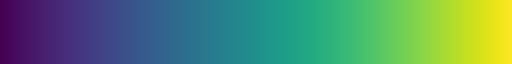

In [7]:
viridis        =   mpl.cm.viridis
viridis

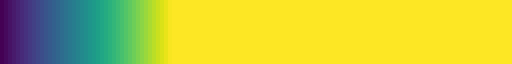

In [8]:
Cu_cmap         =   mpl.colors.ListedColormap( viridis(np.linspace(0,3,128)) , name='Copper (PPM)' )
Cu_cmap

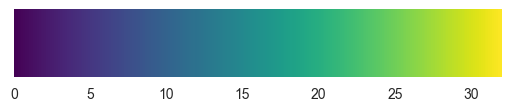

In [9]:
norm            =   mpl.colors.Normalize( vmin=0.0 , vmax= 32 ) # you can change maximum later
fig_colorbar , ax_colorbar      =   plt.subplots( figsize = (5,1) , layout='constrained' )
fig_colorbar.colorbar(
    mpl.cm.ScalarMappable( norm = norm , cmap = viridis ),
    orientation='horizontal',
    cax=ax_colorbar,
)

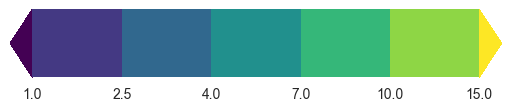

In [10]:
bounds       =   [ 1.0 , 2.5 , 4 , 7 , 10 , 15 ] # you change these values based on your needs later
bnorm        =   mpl.colors.BoundaryNorm( bounds , viridis.N , extend='both')
fig_colorbar , ax_colorbar      =   plt.subplots( figsize = (5,1) , layout='constrained' )
fig_colorbar.colorbar(
    mpl.cm.ScalarMappable( norm = bnorm , cmap = viridis ),
    orientation='horizontal',
    cax=ax_colorbar,
)

### Importing data

Data required for this assignment are available on both HuggingFace Datasets ( known as 🤗 ), which is lightweight library providing many facilities such as enabling dataloaders and efficient data preprocessing, and GitHub.Visit [🎓 **Documentation**](https://huggingface.co/docs/datasets/) for more information if you are interested about HuggingFace!

#### Access through HuggingFace

If you prefer to use HuggingFace, the `load_dataset` function will load and store the data for you. On this case, `kiarash13p` is my username and `Tallberg` is the name of the dataset we are looking to investigate.

In [11]:
Cu_dataset      =   load_dataset( 'kiarash13p/Tallberg' , data_files="Tallberg Cu Data.csv")['train']
Cu_dataset.features

{'X': Value(dtype='int64', id=None),
 'Y': Value(dtype='int64', id=None),
 'Cu_ppm': Value(dtype='float64', id=None)}

In case of facing issues on **32-bit operating systems** or due to other issues ( Which I have no idea about the reasons 😊 ), you might be required to execute the following codes to cast conversion on columns
```python
new_features            =   Cu_dataset.features.copy()
new_features['X']       =   Value( dtype='int32' , id=None )
new_features['Y']       =   Value( dtype='int32' , id=None )
new_features['Cu_ppm']  =   Value( dtype='float32' , id=None ) # or float, but not use double ( which is float64 )
Cu_dataset.cast( new_features )
```

#### Access through GitHub

If you prefer to retrieve data from GitHub, simply execute the following function, which works both Online ( in case of accessing through data on GitHub ), and Offline mode ( in case of pulling by git for once at least )

In [12]:
def isfloat(string):
    try:
        float(string)
        return True
    except ValueError:
        return False


def load_dataset_github( Offline : bool = False , element : str = "Cu" ) -> list:
    assert element in ["Cu" , "Na2O"] , "\nThe element should be either 'Cu' or 'Na2O' . Please check the element name and try again.\n"
    if Offline:
        data    =   open( os.path.join( root_folder , 'Data' , 'Tallberg' , 'Tallberg ' + element + ' Data.csv' ) , 'r' ).readlines()
        colnames = data[0]
        data    =   [ list(map(float, row.split(','))) for row in data[1:] ] if element == "Cu" else [ [row.split(',')[0], *list(map(lambda x: float(x) if isfloat(x) else -1 , row.split(',')[1:])) ]  for row in data[1:] ]
    else:
        # URL of the raw data file on GitHub
        url = "https://raw.githubusercontent.com/kiarash13p/Mineral-Resource-Geology-and-Modelling/83d8d4b3addba45e2668265fabab6df9e283de9c/Data/Tallberg/Tallberg%20"+element+"%20Data.csv"
        # Make an HTTP GET request to retrieve the data
        response = requests.get(url)
        response.raise_for_status() # prevent proceeding for invalid requests
        # Read the response into a list format
        data = list( csv.reader( StringIO( response.text ) ) )
        colnames = data[0]
        data    =   [ list(map(float, row)) for row in data[1:] ] if element == "Cu" else [ [row[0], *list(map(lambda x: float(x) if isfloat(x) else -1 , row[1:] )) ] for row in data[1:] ]
        
    return data, colnames

In [13]:
Cu_dataset_github , colnames = load_dataset_github(False,"Cu")
print( colnames ,' \n\n', Cu_dataset_github[15:20] )

['X', 'Y', 'Cu_ppm']  

 [[1672437.0, 7236387.0, 6.6], [1674246.0, 7233183.0, 6.9], [1671941.0, 7233994.0, 6.1], [1670123.0, 7228819.0, 7.0], [1673030.0, 7240770.0, 4.7]]


### Knowing dataset
By considering that the data is well-preprocessed and well-cleaned ( like eliminating any missing or unsual values, which might not be done yet if you look carefully to the datasets ), lets see what is happening inside the dataset
Notice that you may required to draw more diagrams to investigate deeper inside the dataset. Following code is just merely as an example.

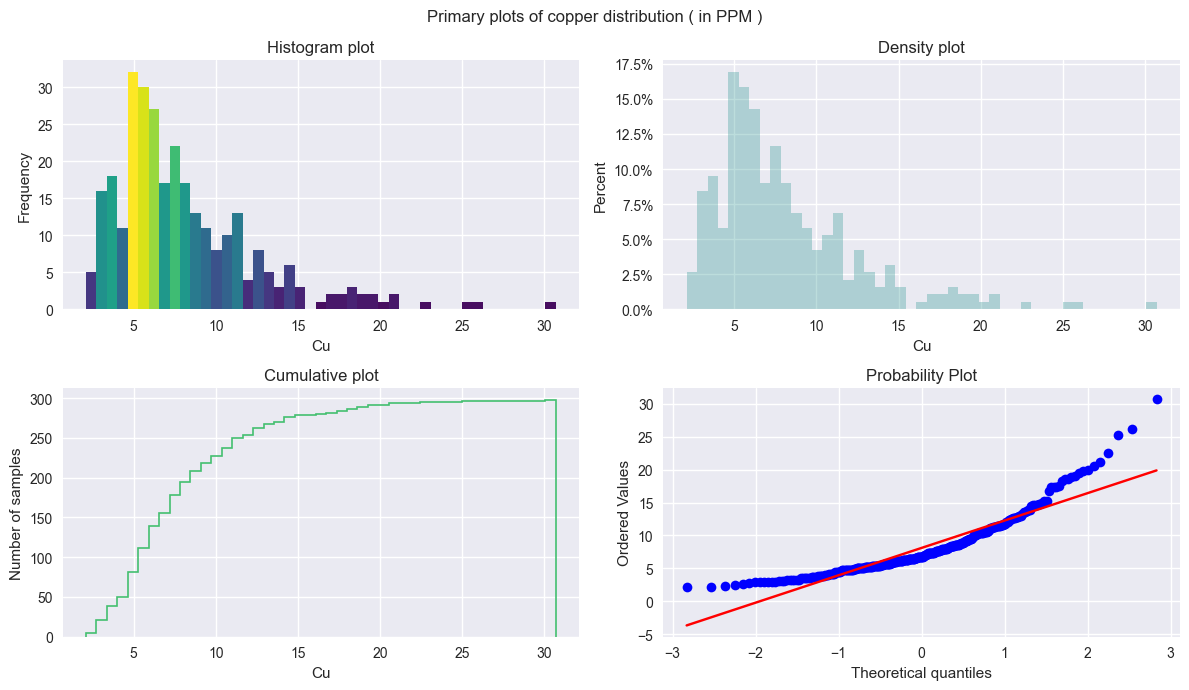

In [14]:
fig_hist , ((ax1,ax2),(ax3,ax4))    =   plt.subplots( nrows= 2 , ncols= 2 , figsize = (12,7) , tight_layout = True  )
binsize     =   45
fig_hist.suptitle( "Primary plots of copper distribution ( in PPM )" )
ax1_n , ax1_bins , ax1_patches          =   ax1.hist( Cu_dataset['Cu_ppm'] , bins = binsize )
ax1.set_title("Histogram plot")
ax1.set_xlabel("Cu")
ax1.set_ylabel("Frequency")
# Coloring by height of the bins
fracs       =   ax1_n / ax1_n.max()
ax1_norm    =   mpl.colors.Normalize( fracs.min() , fracs.max() )
for _frac , _patch in zip( fracs , ax1_patches ):
    _patch.set_facecolor( viridis( ax1_norm( _frac )))

ax2_n , ax2_bins , ax2_patches          =   ax2.hist( Cu_dataset['Cu_ppm'] , bins = binsize , density=True , color=viridis(0.5) , alpha = 0.3 )
ax2.set_title("Density plot")
ax2.set_xlabel("Cu")
ax2.set_ylabel("Percent")
ax2.yaxis.set_major_formatter( PercentFormatter(xmax=1))

ax3_n , ax3_bins , ax3_patches          =   ax3.hist( Cu_dataset['Cu_ppm'] , bins = binsize , cumulative=True , color=viridis(0.7) , histtype='step' , linewidth = 1.2 )
ax3.set_title("Cumulative plot")
ax3.set_xlabel("Cu")
ax3.set_ylabel("Number of samples")
stats.probplot( Cu_dataset['Cu_ppm'] , plot=ax4 )

plt.show()

***
## Question 1

Predict giving reasons, where to focus further exploration for porphyry copper deposit.

Notes:
-   You are required to provide proofs for your claims and thoughts
-   Feel free to depict more charts and diagrams to increase your understanding about the dataset
<br>
<br>
***

***
## Question 2

Plot the Tallberg deposit at X=1693000 and Y=7221000. How does this compare to the prediction you made from the till geochemistry?

Notes:
-   You are required to provide proofs for your claims and thoughts
-   Feel free to depict more charts and diagrams to increase your understanding about the dataset
-   You are required to plot copper distribution in contours given the X and Y available on dataset
<br>
<br>

***

### Plotting

Below, the function `grid` provides the plot map of transects from A to K. These profiles are defined based on sampling points, assigned around the vicinity of Porphyry-type copper and gold mineralization of Tallberg. Notice that more information about grid points and measurements can be found on the refrences.

In [15]:
def grid( feature: str = None ):
    fig_2 , ax_2   =   plt.subplots( nrows= 1 , ncols= 1 , figsize = (11,7) , tight_layout = True  )
    pointlist   = [
    {"A1":[  0       , 2.24838  ]},
    {"A2":[  0       , 2.14147  ]},
    {"A3":[  0       , 2.03456  ]},
    {"A4":[  0       , 1.93413  ]},
    {"A5":[  0       , 1.4514   ]},
    {"A6":[  0       , 1.32181  ]},
    {"A7":[  0       , 1.20194  ]},
    {"A8":[  0       , 1.06587  ]},
    {"A9":[  0       , 0.929806 ]},
    {"A10":[ 0       , 0.800216 ]},
    {"A11":[ 0       , 0.677106 ]},
    {"A12":[ 0       , 0.563715 ]},
    {"B1":[ 0.92976 , 1.68467  ]},
    {"B2":[ 0.948199, 1.56479  ]},
    {"B3":[ 0.966714, 1.43197  ]},
    {"B4":[ 0.967212, 1.34773  ]},
    {"C1":[ 1.79848 , 1.69762  ]},
    {"C2":[ 1.81682 , 1.59395  ]},
    {"C3":[ 1.81745 , 1.48704  ]},
    {"C4":[ 1.7826  , 1.38337  ]},
    {"C5":[ 1.8187  , 1.27646  ]},
    {"C6":[ 1.80181 , 1.13391  ]},
    {"D1":[ 2.82273 , 2.39417  ]},
    {"D2":[ 2.84111 , 2.28402  ]},
    {"D3":[ 2.86087 , 1.9406   ]},
    {"D4":[ 2.82595 , 1.84989  ]},
    {"D5":[ 2.84425 , 1.7527   ]},
    {"D6":[ 2.86275 , 1.62311  ]},
    {"D7":[ 2.84567 , 1.51296  ]},
    {"D8":[ 2.86401 , 1.40929  ]},
    {"D9":[ 2.86472 , 1.28942  ]},
    {"D10":[ 2.86545 , 1.16631  ]},
    {"D11":[ 2.88391 , 1.0432   ]},
    {"G4":[ 6.14052 , 2.02484  ]},
    {"G5":[ 6.12351 , 1.90173  ]},
    {"G6":[ 6.07086 , 1.81102  ]},
    {"G7":[ 6.12464 , 1.71058  ]},
    {"G8":[ 6.12564 , 1.54212  ]},
    {"G9":[ 6.16188 , 1.40929  ]},
    {"G10":[ 6.12719 , 1.2797   ]},
    {"G11":[ 6.11032,  1.13391  ]},
    {"G12":[ 6.12876,  1.01404  ]},
    {"G13":[ 6.16493,  0.894168 ]},
    {"G14":[ 6.1301 ,  0.787257 ]},
    {"H1":[ 7.06011,  2.42981  ]},
    {"H2":[ 7.04797,  1.4838   ]},
    {"H3":[ 7.04898,  1.3121   ]},
    {"H4":[ 7.10306,  1.16307  ]},
    {"H5":[ 7.12195,  0.965443 ]},
    {"H6":[ 7.0692 ,  0.890929 ]},
    {"H7":[ 7.03426,  0.803456 ]},
    {"I1":[ 8.62039,  2.42981  ]},
    {"I2":[ 8.62269,  2.04104  ]},
    {"I3":[ 8.59041,  1.50324  ]},
    {"I4":[ 8.6104 ,  1.12095  ]},
    {"I5":[ 8.62884,  1.00108  ]},
    {"I6":[ 8.66569,  0.764579 ]},
    {"I7":[ 8.64909,  0.573434 ]},
    {"J1":[ 10.358 ,  2.42009  ]},
    {"J2":[ 10.3798,  1.74622  ]},
    {"J3":[ 10.3846,  0.923326 ]},
    {"K1":[ 12.5922,  2.39417  ]},
    {"K2":[ 12.5934,  2.20302  ]},
    {"K3":[ 12.5944,  2.03456  ]},
    {"K4":[ 12.5954,  1.85313  ]},
    {"K5":[ 12.5972,  1.56156  ]},
    ]
    ax_2.set_xlim((-6,14))
    ax_2.set_ylim((0,3))
    rectangles = []
    # dropdown = ipywidgets.Dropdown( options=['green', 'red', 'blue'], value='green', description='Color:', disabled=False )
    for dict in pointlist:
        for key in dict:
            # artist_circle   =   patches.Circle( dict[key] , 0.05 , alpha = 0.6 , label = key , color = viridis(0.6)  )
            # ax_2.add_artist( artist_circle )
            square = patches.Rectangle( (dict[key][0]-0.1,dict[key][1]-0.05) , 0.7 , 0.1 , alpha = 0.6 , label = None , color = viridis(0.1) ,
                                        picker = True,
                                        mouseover = True,)
            ax_2.add_patch( square )
            ax_2.scatter( dict[key][0],dict[key][1] , label = 'Sampling points' , color = 'black' , marker='.')
            ax_2.annotate( key , dict[key] ,  xytext=(-8,3) , textcoords='offset points' , horizontalalignment='center', verticalalignment = "center" , fontweight = 'ultralight' , fontsize = 9, rotation = 15)
            
    # display.display(dropdown)
    ax_2.set_xticks(range(0,13))
    ax_2.set_yticks(np.arange(0.5,3.5,0.5))
    ax_2.tick_params( axis = 'both' , direction='in' , pad=-15)
    x_tail = -3.0
    y_tail = 2.0
    x_head = -4.5
    y_head = 2.5
    dx = x_head - x_tail
    dy = y_head - y_tail
    north_arrow =  patches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head), mutation_scale=50 , picker = True , mouseover = True)
    ax_2.add_artist( north_arrow )
    ax_2.annotate( "N" , (x_head,y_head) ,  xytext=(56,-23) , textcoords='offset points' , horizontalalignment='center', verticalalignment = "center" , fontweight = 'heavy' , fontsize = 19, rotation = 0)
    #scale

    scalebar    =   ScaleBar.ScaleBar(0.23 , "km" , length_fraction=0.25 , location='upper center' )
    ax_2.add_artist(scalebar)

    # legend
    handles , labels = ax_2.get_legend_handles_labels()
    handle_list, label_list = [], []
    for handle, label in zip(handles, labels):
        if label not in label_list:
            handle_list.append(handle)
            label_list.append(label)
    fig_2.legend(handles=handle_list, labels=label_list , loc = 'lower left' , bbox_to_anchor = (0.05,0.1) , fontsize = 'small')
    return fig_2 , ax_2

from matplotlib.backend_bases import MouseButton
def onpick(event):
    if event.button is MouseButton.LEFT:
        print("hi")
        print(event.artist.get_path())



(<Figure size 1100x700 with 1 Axes>, <Axes: >)

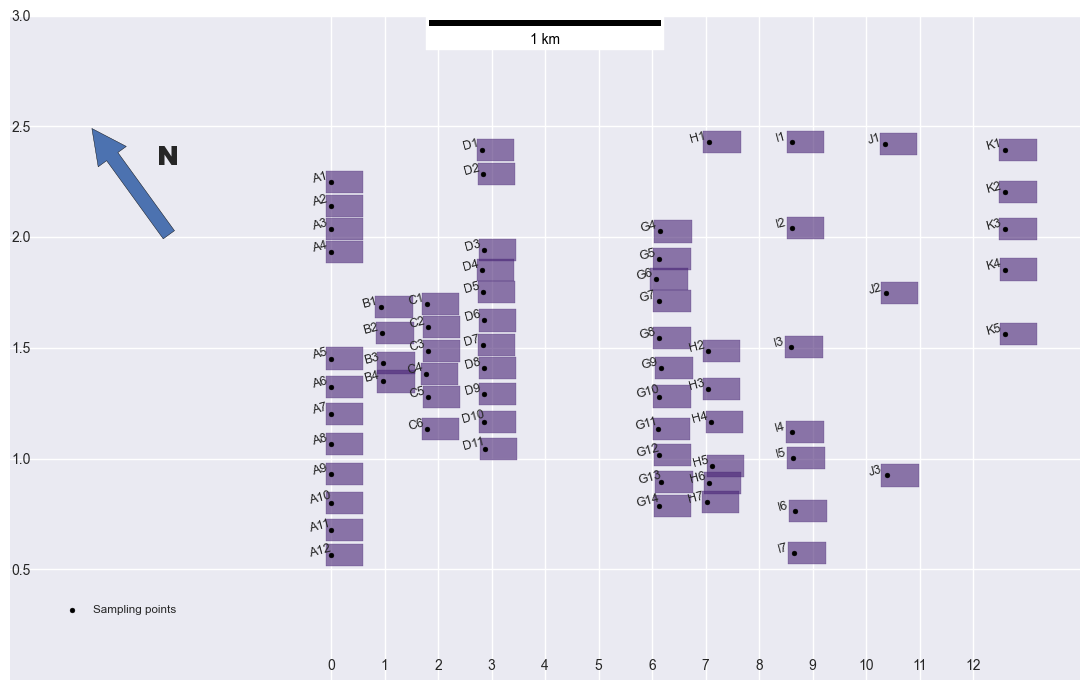

In [16]:

grid()

Composites and elements such as Na<sub>2</sub>O, Sulfur, and Copper is measured on this grid, which is accesible through the command below. Utilize all datasets provided to answer the following questions.

In [17]:
Na2O_dataset      =   load_dataset( 'kiarash13p/Tallberg' , data_files="Tallberg Na2O Data.csv")['train']
Na2O_dataset.features

{'ID': Value(dtype='string', id=None),
 'Na2O_wt%': Value(dtype='float64', id=None),
 'S_ppm': Value(dtype='int64', id=None),
 'Cu_ppm': Value(dtype='int64', id=None),
 'Мо_ppm': Value(dtype='float64', id=None)}

Or you can load the dataset from GitHub ...

In [18]:
Na2O_dataset_github , colnames = load_dataset_github(True,"Na2O")
print( colnames ,' \n\n', Na2O_dataset_github[15:20] )

ID,Na2O_wt%,S_ppm,Cu_ppm,Мо_ppm
  

 [['В4', 2.3, 8700.0, 1520.0, -1], ['С1', 2.5, 15200.0, 1330.0, 55.0], ['С2', 2.2, 19600.0, 1750.0, 53.0], ['С3', 2.8, 35000.0, 1820.0, 58.0], ['С4', 2.7, 30100.0, 1490.0, 39.0]]


***
## Question 3

Plot the anomalous Na<sub>2</sub>O data (~15 pts from transections D to I ) given in the table below on the grids provided to trace the alteration and the anomalous Cu data (~15 pts from transects D to I) to highlight the mineralisation.

Notes:
-   Letters in the Table are associated with vertical lines on the grid.
-   Numbers are used to suffix the letters in the Table and correspond to the sample points adjacent to each line, with numbers increasing downwards.
-   Write down your thoughts and rationale supporting your response. If you need any external coding, share it with us below.
<br>
<br>

***

***
## Question 4
Describe the patterns in alteration and mineralization. How confident are you in constraining where the mineralization is? How would you classify this deposit?
<br>
<br>

***

***
## Question 5
What is the potential significance of the mafic dkes and faults?
<br>
<br>

***

***
## Question 6
What is the average Cu grade of the aerial extend you suggest mining?
<br>
<br>

***

***
## Question 7
If the mineralized zones extend 200m vertically, what would be the tonnage? How much Cu would that supply? Density 2600 kgm<sup>-3</sup>, and 1 ton = 10<sup>6</sup>gr.
<br>
<br>

***

***
## Question 8
The cost of producing the ore ( mining, refining, environmental reclamation, etc. ) will be $25 per ton. What will be the total production cost?
<br>
<br>

***

***
## Question 9
If the price of Cu is 3.34$/lb in June 2024 ( 2000 lb's per ton ), will the deposit be profitable?
<br>
<br>

***

***
## Question 10
Integrate the information you derive into a feasibility report of the ore deposit.

-   You are expected to provide your report in a **pdf** format.
<br>
<br>

***

### References

_*Wilson, M.R., Sehlstedt, S., Claesson, L.Å., Smellie, J.A., Aftalion, M., Hamilton, P.J. and Fallick, A.E., 1987. Jörn: an early Proterozoic intrusive complex in a volcanic-arc environment, north Sweden. Precambrian Research, 36(3-4), pp.201-225*_ ([link](https://www.sciencedirect.com/science/article/pii/0301926887900210))<br>
_*Weihed, P., 1992. Lithogeochemistry, metal and alteration zoning in the Proterozoic Tallberg porphyry-type deposit, northern Sweden. Journal of Geochemical Exploration, 42(2-3), pp.301-325.*_ ([link](https://www.sciencedirect.com/science/article/pii/0375674292900298))